In [1]:
!pip install opencv-python # OpenCV 라이브러리 설치

import cv2 # OpenCV 라이브러리 import
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(360, 360)


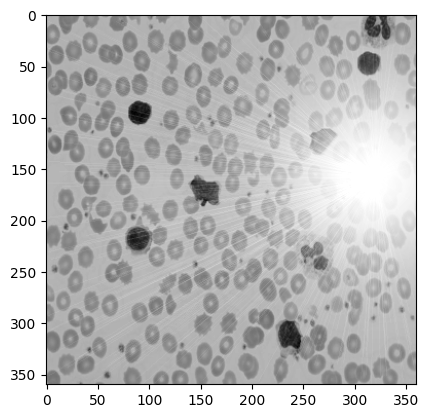

In [4]:
#img = cv2.imread('/content/gdrive/My Drive/Images/milkdrop.bmp')
img = cv2.imread('/content/gdrive/My Drive/Images/cell-bright.bmp') # 이미지 파일 읽기
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
plt.imshow(gimg,cmap='gray')

In [23]:
N = 10

dimh = np.int32(gimg.shape[0]/N)
dimw = np.int32(gimg.shape[1]/N)

dh_rest = np.int32(gimg.shape[0] % N)
dw_rest = np.int32(gimg.shape[1] % N)

meanimg = np.zeros((N,N))
outimg = np.zeros((gimg.shape[0],gimg.shape[1]))



In [24]:
def mean_function(img, dimh, dimw, h, w):
  count = 0  # count 변수를 함수 시작 부분에서 0으로 초기화
  sum = 0
  avg = 0

  for y in range(h, h + dimh):
    for x in range(w, w + dimw):
      sum = sum + img[y, x]
      count = count + 1  # count 변수를 루프 내부에서 증가

  avg = np.int32(sum / (count if count!=0 else 1)) # count가 0인 경우 1로 나누어 ZeroDivisionError 방지
  return avg

In [25]:
for h in range(0, gimg.shape[0]-dh_rest , dimh): # Changed gimg to gimg.shape to access the shape of the image array
  for w in range(0,gimg.shape[1]-dw_rest ,dimw):
    meanimg[np.int32(h/dimh), np.int32(w/dimw)] = mean_function(gimg , dimh ,dimw ,h, w)

(10, 10)


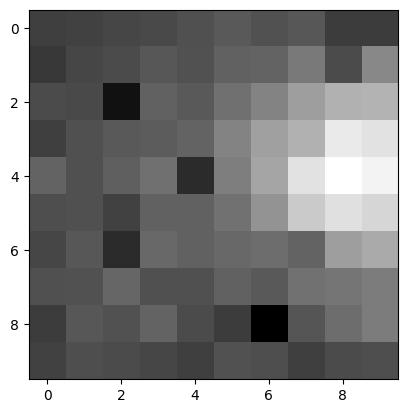

In [26]:
#cv2_imshow(meanimg)
plt.imshow(meanimg , cmap = 'gray')
print(meanimg.shape)

In [27]:
for h in range(0, gimg.shape[0]-dh_rest): # Changed gimg to gimg.shape to access the shape of the image array
  for w in range(0,gimg.shape[1]-dw_rest):
    if(gimg[h,w] > meanimg[np.int32(h/dimh), np.int32(w/dimw)]):
      outimg[h,w] =255
    else:
      pass # Or some other operation you want to perform when the condition is false
      outimg[h,w] = 0


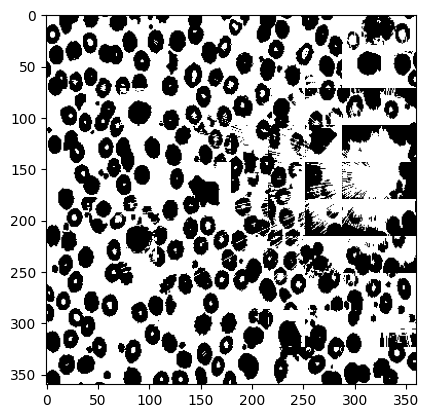

In [28]:
plt.imshow(outimg, cmap ='gray')